In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

In [2]:
def huberizedHingeLoss(x, h):
    if x > 1+h:
        return 0
    elif abs(1-x) <= h:
        return ((1+h-x)**2)/(4*h)
    else:
        return 1-x

def hingeLoss(x):
    return max([0, 1-x])

def misclassLoss(x):
    return 1 if x <= 0 else 0

In [18]:
def compute_obj(x, y, w, C=1.0, h=0.5):
    loss = np.vectorize(huberizedHingeLoss, excluded=['h'])
    
    return np.dot(w, w) + (C/float(x.shape[0]))*sum(loss(y*np.dot(x,w), h))
    #return (C/float(x.shape[0]))*sum(loss(y*np.dot(x,w), h))

In [19]:
def compute_grad(x, y, w, C=1.0, h=0.5):
    p = y*np.dot(x, w)
    gradW = np.zeros(w.shape[0], dtype=float)
    
    def gradHuberHinge(i, j):
        if p[i] > 1+h:
            return 0
        elif abs(1-p[i]) <= h:
            return ((1+h-p[i])/(2*h))*(-y[i]*x[i][j])
        else:
            return (-y[i]*x[i][j])
        
    for j in range(w.shape[0]):
        sum_over_i = 0.0
        for i in range(x.shape[0]):
            sum_over_i += gradHuberHinge(i,j)
        gradW[j] = 2*w[j] + (C/float(x.shape[0]))*sum_over_i
        #gradW[j] = (C/float(x.shape[0]))*sum_over_i
    return gradW

In [5]:
def add_bias_column(x):
    return np.append(x, np.ones(x.shape[0]).reshape(x.shape[0],1), axis=1)

In [6]:
def my_gradient_descent(x, y, F, dF, eta=0.01, maxiter=1000):
    w = np.zeros(x.shape[1])
    for i in range(maxiter):
        grad = dF(x,y,w)
        print F(x,y,w), eta
        w = w - eta*(grad/np.linalg.norm(grad))
    return w

In [7]:
def backoff_gradient_descent(x, y, F, dF, eta=0.01, maxiter=1000):
    # ignore eta
    w = np.zeros(x.shape[1])
    beta = 0.8
    for i in range(maxiter):
        eta = 1
        val = F(x,y,w)
        grad = dF(x,y,w)
        grad_dir = grad/np.linalg.norm(grad)
        while F(x, y, (w - eta * grad)) > F(x, y, w): 
            #print eta
            eta = 0.5 * eta
        print val, eta
        w = w - eta * grad
    return w

In [8]:
def dataset_fixed_cov(n,dim):
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((-np.ones(n), np.ones(n)))
    return X, y

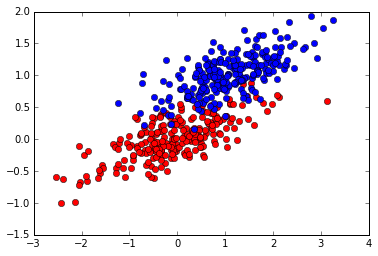

In [9]:
x_train,y_train = dataset_fixed_cov(250,2)
plt.plot(x_train[:250,0],x_train[:250,1], 'o', color='red')
plt.plot(x_train[250:,0],x_train[250:,1], 'o', color='blue')

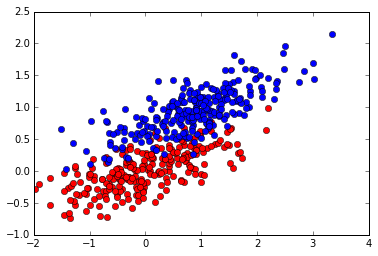

In [10]:
x_test,y_test = dataset_fixed_cov(250,2)
plt.plot(x_test[:250,0],x_test[:250,1], 'o', color='red')
plt.plot(x_test[250:,0],x_test[250:,1], 'o', color='blue')

In [11]:
class my_svm(object):
    def __init__(self, gd):
        self.learnt_w = None
        self.gd = gd
        
    def fit(self, x_train, y_train, eta=0.01, max_iter=1000):
        x_copy = add_bias_column(x_train)
        self.learnt_w = self.gd(x_copy, y_train, compute_obj, compute_grad, eta, max_iter)
        
    def predict(self, x_test):
        x_copy = add_bias_column(x_test)
        y = np.dot(x_copy, self.learnt_w)
        y[y<0] = -1
        y[y>0] = 1
        return y
    
    def score(self, x_test, y_test):
        y_predict = self.predict(x_test)
        bools = y_predict == y_test
        accuracy = bools[bools == True].shape[0]/float(bools.shape[0])
        return accuracy

1.0 0.5
0.872792002555 0.5
0.870251677523 0.5
0.868825117955 0.5
0.868406546726 0.5
0.868209943171 0.5
0.868137870832 0.5
0.868106550457 0.5
0.86809408133 0.5
0.868088788764 0.5
0.868086639028 0.5
0.868085740522 0.5
0.86808537446 0.5
0.868085222297 0.5
0.868085159787 0.5
0.868085134024 0.5
0.868085123406 0.5
0.86808511903 0.5
0.868085117226 0.5
0.868085116482 0.5
0.868085116176 0.5
0.86808511605 0.5
0.868085115998 0.5
0.868085115976 0.5
0.868085115967 0.5
0.868085115964 0.5
0.868085115962 0.5
0.868085115962 0.5
0.868085115961 0.5
0.868085115961 0.5
0.868085115961 0.5
0.868085115961 0.5
0.868085115961 0.5
0.868085115961 0.25
0.868085115961 1
0.868085115961 0.5
0.868085115961 0.5
0.868085115961 0.0009765625
0.868085115961 5.96046447754e-08
0.868085115961 7.45058059692e-09
0.868085115961 4.65661287308e-10
0.868085115961 4.65661287308e-10
0.868085115961 4.65661287308e-10
0.868085115961 4.65661287308e-10
0.868085115961 4.65661287308e-10
0.868085115961 2.32830643654e-10
0.868085115961 2.3283

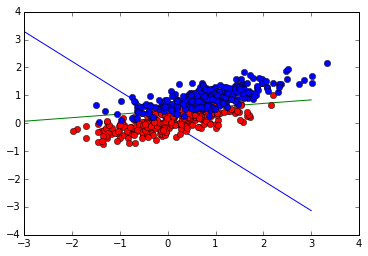

In [20]:
svm = my_svm(backoff_gradient_descent)
svm.fit(x_train, y_train, 0.01, 100)
line = svm.learnt_w
xx = np.linspace(-3, 3)
yy = ((-line[0]/line[1])*xx)+(-line[2]/line[1]) # y = (-a/b)*x + (-c/b)
plt.plot(xx, yy)
print line

svm = LinearSVC()
svm.fit(x_train, y_train)
line = svm.coef_
xx = np.linspace(-3, 3)
yy = ((-svm.coef_[0][0]/svm.coef_[0][1])*xx)+(-svm.intercept_[0]/svm.coef_[0][1]) # y = (-a/b)*x + (-c/b)
print svm.coef_, svm.intercept_
plt.plot(xx, yy)

plt.plot(x_test[:250,0],x_test[:250,1], 'o', color='red')
plt.plot(x_test[250:,0],x_test[250:,1], 'o', color='blue')

In [13]:
def compute_obj(x, y, w, C=1.0, h=0.5):
    loss = np.vectorize(huberizedHingeLoss, excluded=['h'])
    
    #return np.dot(w, w) + (C/float(x.shape[0]))*sum(loss(y*np.dot(x,w), h))
    return (C/float(x.shape[0]))*sum(loss(y*np.dot(x,w), h))
    
def compute_grad(x, y, w, C=1.0, h=0.5):
    p = y*np.dot(x, w)
    gradW = np.zeros(w.shape[0], dtype=float)
    
    def gradHuberHinge(i, j):
        if p[i] > 1+h:
            return 0
        elif abs(1-p[i]) <= h:
            return ((1+h-p[i])/(2*h))*(-y[i]*x[i][j])
        else:
            return (-y[i]*x[i][j])
        
    for j in range(w.shape[0]):
        sum_over_i = 0.0
        for i in range(x.shape[0]):
            sum_over_i += gradHuberHinge(i,j)
        #gradW[j] = 2*w[j] + (C/float(x.shape[0]))*sum_over_i
        gradW[j] = (C/float(x.shape[0]))*sum_over_i
    return gradW

1.0 1
0.601820735218 1
0.520756593784 1
0.464200298155 1
0.424779183101 1
0.395647244794 1
0.372512534775 1
0.353340713561 1
0.336930668345 1
0.322614794616 1
0.309966210539 1
0.298671534288 1
0.288524772259 1
0.279392643735 1
0.271131337232 1
0.263631720057 1
0.256796285227 1
0.250538170558 1
0.244798623248 1
0.239536977107 1
0.234712745933 1
0.230275698831 1
0.22617854694 1
0.222391112675 1
0.218888384458 1
0.215638652995 1
0.212614431154 1
0.20979233722 1
0.207155505677 1
0.204689234709 1
0.20237979888 1
0.20021446751 1
0.198176270402 1
0.196251200119 1
0.194428803606 1
0.192700868369 1
0.191060210479 1
0.189500567453 1
0.188015411532 1
0.186599215458 1
0.185247159246 1
0.183954377422 1
0.18271715884 1
0.181531445619 1
0.180393581404 1
0.179298807264 1
0.17824399376 1
0.177226402307 1
0.17624322845 1
0.175293366389 1
0.174374751234 1
0.173485892119 1
0.172625465601 1
0.171792415825 1
0.170985520171 1
0.170203744388 1
0.16944619727 1
0.168711799126 1
0.16799957137 1
0.167308688682 1


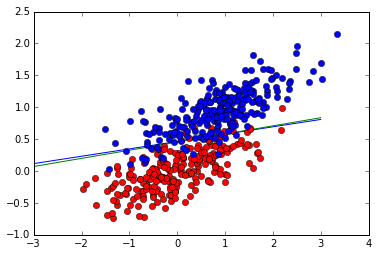

In [16]:
svm = my_svm(backoff_gradient_descent)
svm.fit(x_train, y_train, 0.01)
line = svm.learnt_w
print line
xx = np.linspace(-3, 3)
yy = ((-line[0]/line[1])*xx)+(-line[2]/line[1]) # y = (-a/b)*x + (-c/b)
plt.plot(xx, yy)


svm = LinearSVC()
svm.fit(x_train, y_train)
line = svm.coef_
xx = np.linspace(-3, 3)
yy = ((-svm.coef_[0][0]/svm.coef_[0][1])*xx)+(-svm.intercept_[0]/svm.coef_[0][1]) # y = (-a/b)*x + (-c/b)
print svm.coef_, svm.intercept_
plt.plot(xx, yy)

plt.plot(x_test[:250,0],x_test[:250,1], 'o', color='red')
plt.plot(x_test[250:,0],x_test[250:,1], 'o', color='blue')